In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [30]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [31]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # Output layer with 10 neurons (one for each class)
])


In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [33]:
history=model.fit(train_images, train_labels, epochs=10, 
          validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3611 - loss: 1.7373 - val_accuracy: 0.5600 - val_loss: 1.2277
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5761 - loss: 1.1946 - val_accuracy: 0.6158 - val_loss: 1.0735
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6392 - loss: 1.0204 - val_accuracy: 0.6650 - val_loss: 0.9646
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6907 - loss: 0.8862 - val_accuracy: 0.6753 - val_loss: 0.9283
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7189 - loss: 0.8114 - val_accuracy: 0.6929 - val_loss: 0.8888
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7342 - loss: 0.7491 - val_accuracy: 0.6984 - val_loss: 0.8846
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7536 - loss: 0.6963 - val_accuracy: 0.7030 - val_loss: 0.8617
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7755 -

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - 4ms/step - accuracy: 0.7139 - loss: 0.8692

Test accuracy: 0.7139000296592712


In [35]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Print the first prediction
print(predictions[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[1.6004940e-02 4.1804457e-04 1.1031578e-02 6.0247672e-01 4.0324707e-02
 8.1818424e-02 8.9064566e-03 4.1260305e-03 2.1418047e-01 2.0712625e-02]


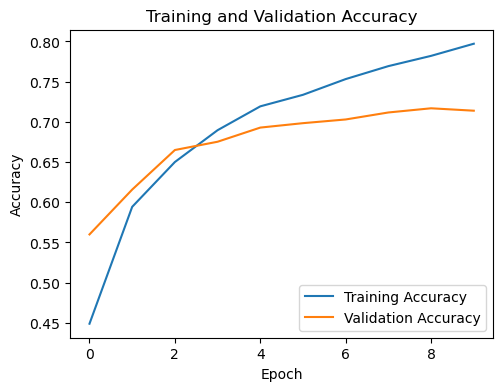

In [36]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.show()